# Cifa-100 이미지 분류

## 전체 데이터 중 일부만 사용

### 모델 출처: Divya Agarwal

### Cifar100 데이터 로드

In [29]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100

(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode = 
                                                         'fine')

In [30]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [32]:
y_train[:10]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1],
       [86],
       [90],
       [28],
       [23],
       [31]])

### 데이터 확인

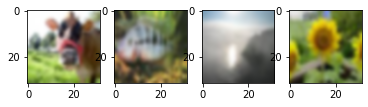

In [33]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(141)
plt.imshow(X_train[0], interpolation='bicubic')
plt.grid(False)
plt.subplot(142)
plt.imshow(X_train[4], interpolation = 'bicubic')
plt.grid(False)
plt.subplot(143)
plt.imshow(X_train[8], interpolation = 'bicubic')
plt.grid(False)
plt.subplot(144)
plt.imshow(X_train[12], interpolation='bicubic')
plt.grid(False)
plt.show()

In [34]:
y_train[0], y_train[4], y_train[8], y_train[12]

(array([19]), array([1]), array([23]), array([82]))

### 자료형 변환 및 스케일링

- X: 실수형으로 정규화
- Y: 1-hot encoding

In [35]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

print(X_train.shape, X_train.dtype)

(50000, 32, 32, 3) float32


In [36]:
Y_train = tf.keras.utils.to_categorical(y_train, 100)
Y_test = tf.keras.utils.to_categorical(y_test,100)

In [37]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

### 자료의 일부만 사용하여 모델 테스트하기

In [38]:
from sklearn.model_selection import train_test_split

seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(X_test, Y_test, test_size=2, random_state = seed)

### 모델 구현

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import Activation
import numpy as np

np.random.seed(0)


In [40]:
model = Sequential()

# Input Layer
model.add(Conv2D(32, (3,3), padding='same', input_shape = X_train.shape[1:]))
model.add(Activation('relu'))
# MAXPOOL Layer 1
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
# CONV2D Layer 2
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
# MAXPOOL Layer 2
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
# Add a dropout of 10%
model.add(Dropout(0.1))
# CONV2D Layer 3
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
# MAXPOOL Layer 3
model.add(MaxPooling2D(pool_size=(2,2)))
# Add dropout of 25%
model.add(Dropout(0.25))
# flatten 
model.add(Flatten())
# Fully Connected Layer 1
model.add(Dense(512))
model.add(Activation('relu'))
# Adding a dropout of 50%
model.add(Dropout(0.5))
# Output Layer (Fully Connected Layer 2) 
model.add(Dense(100))
model.add(Activation('softmax'))
          
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
activation_8 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_9 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)         

In [41]:
opt = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [42]:
history = model.fit(X_train, Y_train, epochs=100, batch_size=50,
                    validation_data=(X_test, Y_test), verbose=1)

Train on 9998 samples, validate on 2 samples
Epoch 1/100
9998/9998 [==============================] - 8s 812us/sample - loss: 4.5941 - accuracy: 0.0145 - val_loss: 4.5785 - val_accuracy: 0.0000e+00
Epoch 2/100
9998/9998 [==============================] - 8s 829us/sample - loss: 4.4370 - accuracy: 0.0323 - val_loss: 3.6592 - val_accuracy: 0.5000
Epoch 3/100
9998/9998 [==============================] - 9s 909us/sample - loss: 4.3019 - accuracy: 0.0419 - val_loss: 3.0236 - val_accuracy: 0.5000
Epoch 4/100
9998/9998 [==============================] - 9s 851us/sample - loss: 4.2079 - accuracy: 0.0524 - val_loss: 2.3343 - val_accuracy: 0.5000
Epoch 5/100
9998/9998 [==============================] - 8s 828us/sample - loss: 4.1021 - accuracy: 0.0723 - val_loss: 1.9153 - val_accuracy: 0.5000
Epoch 6/100
9998/9998 [==============================] - 8s 835us/sample - loss: 4.0195 - accuracy: 0.0860 - val_loss: 1.6575 - val_accuracy: 0.5000
Epoch 7/100
9998/9998 [==============================] - 

9998/9998 [==============================] - 8s 797us/sample - loss: 2.1204 - accuracy: 0.4384 - val_loss: 0.4091 - val_accuracy: 1.0000
Epoch 56/100
9998/9998 [==============================] - 8s 796us/sample - loss: 2.0914 - accuracy: 0.4410 - val_loss: 0.4560 - val_accuracy: 1.0000
Epoch 57/100
9998/9998 [==============================] - 8s 795us/sample - loss: 2.0639 - accuracy: 0.4455 - val_loss: 0.3931 - val_accuracy: 1.0000
Epoch 58/100
9998/9998 [==============================] - 8s 796us/sample - loss: 2.0530 - accuracy: 0.4518 - val_loss: 0.4147 - val_accuracy: 1.0000
Epoch 59/100
9998/9998 [==============================] - 8s 797us/sample - loss: 2.0067 - accuracy: 0.4655 - val_loss: 0.4569 - val_accuracy: 1.0000
Epoch 60/100
9998/9998 [==============================] - 8s 798us/sample - loss: 1.9824 - accuracy: 0.4651 - val_loss: 0.4013 - val_accuracy: 1.0000
Epoch 61/100
9998/9998 [==============================] - 8s 797us/sample - loss: 1.9448 - accuracy: 0.4778 - val

In [47]:
# 테스트 정확도 출력 
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))


2/2 [==============================] - 0s 2ms/sample - loss: 0.3967 - accuracy: 1.0000

 Test Accuracy: 1.0000


In [48]:
# 테스트셋
y_vloss = history.history['val_loss']
y_vacc = history.history['val_accuracy']
# 학습셋
y_loss = history.history['loss']
y_acc = history.history['accuracy']

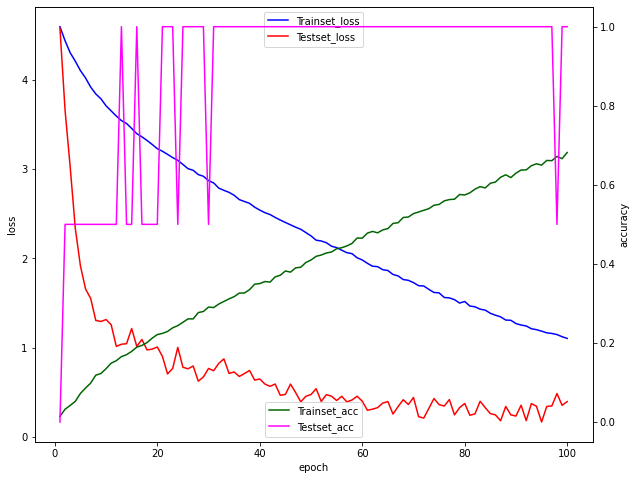

In [49]:
# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
fig, ax0 = plt.subplots(figsize=(10,8))
ax1 = ax0.twinx()
ax0.plot(x_len, y_loss, c="blue", label='Trainset_loss')
ax0.plot(x_len, y_vloss, c="red", label='Testset_loss')
ax0.set_ylabel('loss')
ax1.plot(x_len, y_acc, c="darkgreen", label='Trainset_acc')
ax1.plot(x_len, y_vacc, c="magenta", label='Testset_acc')
ax1.set_ylabel('accuracy')
ax0.set_xlabel('epoch')
ax0.legend(loc='upper center')
ax1.legend(loc='lower center')
plt.show()

### 초록 (train set의 정확도)
### 분홍 (test set의 정확도)
### 빨강 (test set의 손실도)
### 파랑 (train set의 손실도)